# Práctica 03
**Vargas Bravo Paola**

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from random import randint

In [86]:
def balanced_mnist_set():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train / 255
    x_test  = x_test / 255

    # Se obtiene una muestra con igual número de cincos vs no cincos
    idx_y_train_5 = np.where(y_train == 5)[0]
    idx_y_train_n5 = np.where(y_train != 5)[0]
    idx_y_train_n5 = np.random.choice(idx_y_train_n5, idx_y_train_5.shape[0], replace=False)

    idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
    np.random.shuffle(idx_y_train)

    x_train = x_train[idx_y_train]
    y_train = y_train[idx_y_train]

    idx_y_test_5 = np.where(y_test == 5)[0]
    idx_y_test_n5 = np.where(y_test != 5)[0]
    idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

    idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
    np.random.shuffle(idx_y_test)

    x_test = x_test[idx_y_test]
    y_test = y_test[idx_y_test]

    y_train_binary = (y_train == 5).astype(int)
    y_test_binary = (y_test == 5).astype(int)

    return (x_train, y_train_binary), (x_test, y_test_binary)

In [87]:
def show_classification_errors(x, y_true, y_pred, n_errors=80):
    error_indices = np.where(y_true != y_pred)[0]
    selected_indices = np.random.choice(error_indices, min(n_errors, len(error_indices)), replace=False)

    plt.figure(figsize=(14, 12))  # Aumentamos el tamaño de la figura para mayor claridad
    for i, idx in enumerate(selected_indices):
        plt.subplot(10, 10, i + 1)  # Ajustamos el número de filas y columnas para tener espacio entre las imágenes
        plt.imshow(x[idx], cmap='pink')
        plt.title(f'T: {y_true[idx]}, P: {y_pred[idx]}')
        plt.axis('off')
        plt.subplots_adjust(wspace=0.8, hspace=0.8)  # Añadimos más espacio entre las subparcelas
    plt.show()

In [88]:
(x_train, y_train), (x_test, y_test) = balanced_mnist_set()

In [89]:
# Construir el modelo de red neuronal
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [91]:
#Definir Early Stopping
early = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Compilar el modelo
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.15, callbacks=[early])

Epoch 1/50
288/288 [==============================] - 3s 7ms/step - loss: 0.1544 - accuracy: 0.9575 - val_loss: 0.1631 - val_accuracy: 0.9527
Epoch 2/50
288/288 [==============================] - 2s 6ms/step - loss: 0.1430 - accuracy: 0.9602 - val_loss: 0.1529 - val_accuracy: 0.9564
Epoch 3/50
288/288 [==============================] - 1s 5ms/step - loss: 0.1343 - accuracy: 0.9619 - val_loss: 0.1469 - val_accuracy: 0.9557
Epoch 4/50
288/288 [==============================] - 1s 4ms/step - loss: 0.1277 - accuracy: 0.9643 - val_loss: 0.1404 - val_accuracy: 0.9576
Epoch 5/50
288/288 [==============================] - 2s 9ms/step - loss: 0.1222 - accuracy: 0.9639 - val_loss: 0.1389 - val_accuracy: 0.9582
Epoch 6/50
288/288 [==============================] - 1s 4ms/step - loss: 0.1182 - accuracy: 0.9659 - val_loss: 0.1370 - val_accuracy: 0.9576
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9673 - val_loss: 0.1317 - val_accuracy: 0.9619
Epoch 

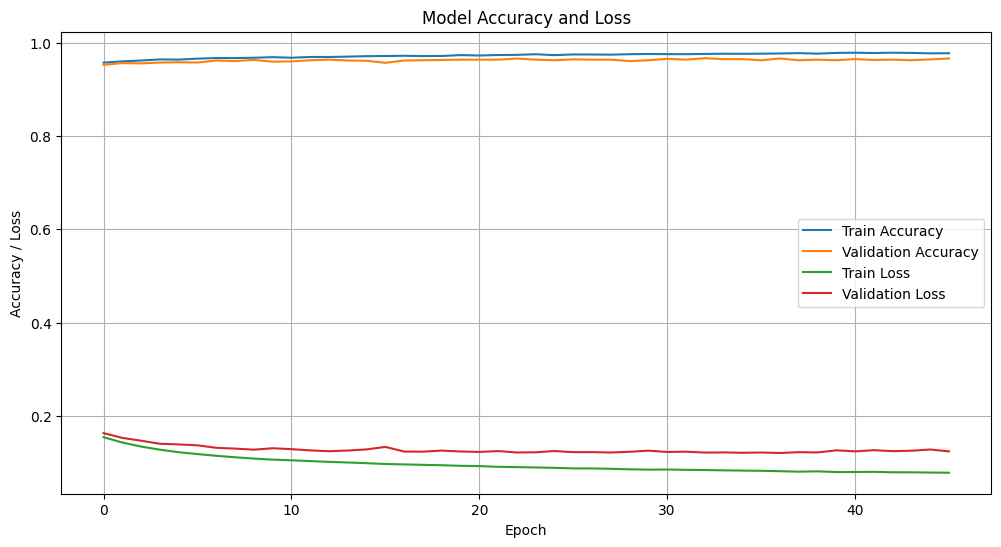

In [92]:
# Graficar el histórico de accuracy y loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# Evaluar el modelo
y_pred =  (model.predict(x_test, verbose=0) >= 0.5).astype(int)[:,0]

In [94]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy :",model.evaluate(x_test, y_test, verbose=0)[1])
print("Precision Score (Class 0):", precision_score(y_test, y_pred, pos_label=0))
print("Recall Score (Class 0):", recall_score(y_test, y_pred, pos_label=0))
print("F1 Score (Class 0):", f1_score(y_test, y_pred, pos_label=0))

print("Precision Score (Class 1):", precision_score(y_test, y_pred))
print("Recall Score (Class 1):", recall_score(y_test, y_pred))
print("F1 Score (Class 1):", f1_score(y_test, y_pred))

Confusion Matrix:
[[859  33]
 [ 38 854]]
Accuracy : 0.9602017998695374
Precision Score (Class 0): 0.9576365663322185
Recall Score (Class 0): 0.9630044843049327
F1 Score (Class 0): 0.9603130240357741
Precision Score (Class 1): 0.9627959413754228
Recall Score (Class 1): 0.9573991031390134
F1 Score (Class 1): 0.9600899381675099


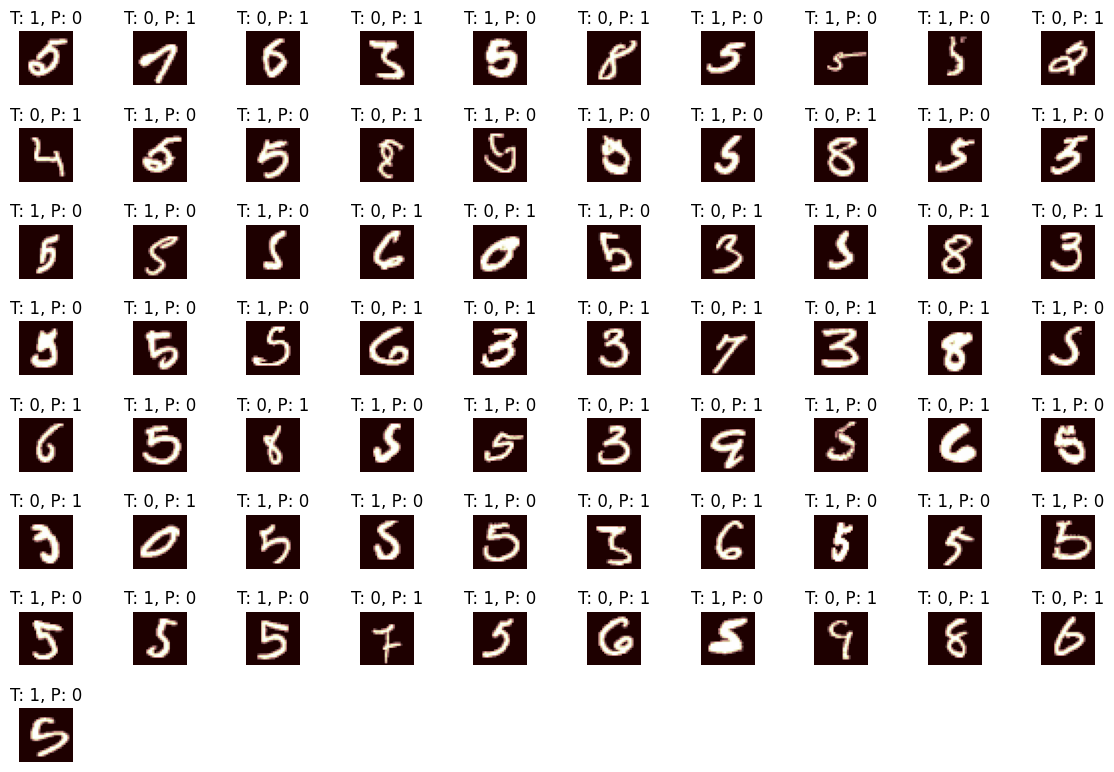

In [95]:
# Mostrar imágenes de errores de clasificación
show_classification_errors(x_test, y_test, y_pred)

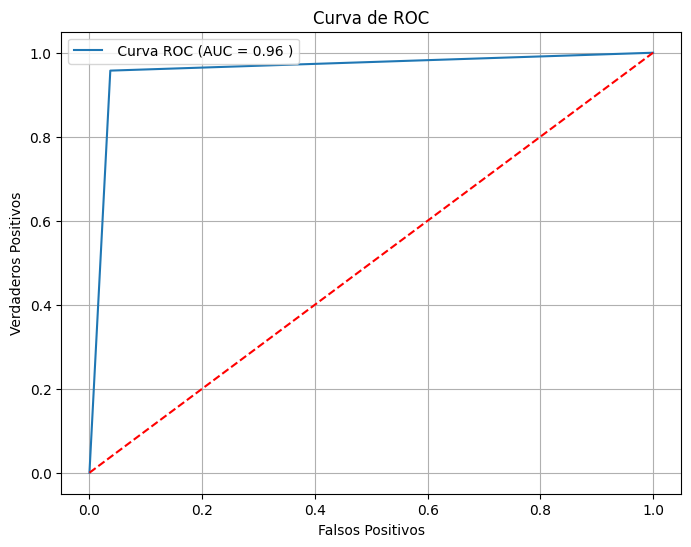

AUC Score: 0.960201793721973


In [96]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f' Curva ROC (AUC = {auc:.2f} )')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Curva de ROC')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", auc)

# Obtuvimos un AUC de 0.9602, lo que indica que el modelo tiene un excelente rendimiento para discriminar entre las clases positivas y negativas. Específicamente, esto significa que hay una alta probabilidad de que el modelo clasifique correctamente una instancia positiva por encima de una instancia negativa #

## El umbral de 0.5 es justificado en la base de datos MNIST debido a que se trata de un conjunto de datos bien balanceado. En MNIST, cada clase representa un dígito del 0 al 9, y la cantidad de imágenes para cada dígito suele ser similar. Dado este equilibrio en la distribución de clases, no hay una clase dominante sobre las demás.

## Cuando se trabaja con un conjunto de datos balanceado como MNIST, asignar un umbral de 0.5 para la clasificación es razonable porque no hay una razón inherente para preferir un tipo de error sobre otro. En otras palabras, no hay una clase que sea más importante que otra en términos de clasificación incorrecta.

## Por lo tanto, un umbral de 0.5 refleja la equidad en la evaluación de errores de clasificación y proporciona un punto de partida neutral para la toma de decisiones. Esto significa que se da igual peso a los falsos positivos y a los falsos negativos, lo que es adecuado cuando no hay consideraciones específicas sobre los costos de errores de clasificación o cuando todas las clases tienen igual importancia.

## Además, en el caso de la base de datos MNIST, donde el objetivo es reconocer dígitos escritos a mano, es probable que no haya costos asimétricos asociados con los errores de clasificación. Por ejemplo, el costo de clasificar erróneamente un dígito "2" como un "7" es probablemente similar al costo de clasificar erróneamente un "7" como un "2". Por lo tanto, el umbral de 0.5 sigue siendo una elección válida desde una perspectiva de costos equilibrados